**Analisis De Operativos categorizados como amarillos y verdes.**


Empezamos con un analisis exploratorio de los datos para entender como es comportan en este operativo de barrido y nuestros criterios.
Importamos las rutas de resultados y las combinamos con la carga de pandas para archivos de excel.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#ruta_criterios=('Criterios.xlsx')
ruta_resultados=('archivo_estandarizado_22-8-24.xlsx')

#df_criterios = pd.read_excel(ruta_criterios)

df_resultados = pd.read_excel(ruta_resultados)

In [7]:
df_resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51035 entries, 0 to 51034
Data columns (total 62 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Cuenta                                     51035 non-null  object        
 1   REGION                                     49548 non-null  object        
 2   Zona                                       51035 non-null  object        
 3   ENTITY_NAME                                37933 non-null  object        
 4   PREM_ADDRESS1_UPR                          37933 non-null  object        
 5   Municipio                                  51035 non-null  object        
 6   Localidad                                  51035 non-null  object        
 7   BARRIO                                     37933 non-null  object        
 8   Ciclo                                      51035 non-null  object        
 9   Tarifa           

Si es interesante nos quedamos unicamente con los casos VERDES y AMARILLOS

## ***Analisis De Operativos categorizados como amarillos y verdes.***

Ya cargamos los datos, vamos a filtrar por color Rojo y por Zona Merlo

In [5]:
#df_resultados = df_resultados[df_resultados['Color'] != "Rojo"]
#df_resultados.info()

In [8]:
# Filtrar filas donde la columna 'Zona' tiene el valor 'Merlo'
#df_resultados = df_resultados[df_resultados['Zona'] == "Zona San Martin"]

# Verificar el resultado
df_resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51035 entries, 0 to 51034
Data columns (total 62 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Cuenta                                     51035 non-null  object        
 1   REGION                                     49548 non-null  object        
 2   Zona                                       51035 non-null  object        
 3   ENTITY_NAME                                37933 non-null  object        
 4   PREM_ADDRESS1_UPR                          37933 non-null  object        
 5   Municipio                                  51035 non-null  object        
 6   Localidad                                  51035 non-null  object        
 7   BARRIO                                     37933 non-null  object        
 8   Ciclo                                      51035 non-null  object        
 9   Tarifa           

## ***DATA CLEANING***

In [9]:
import pandas as pd

# Eliminar filas con `RESULTADO_AC` nulo
df_clean = df_resultados.dropna(subset=['RESULTADO_AC']).copy()

# Rellenar los NA en la columna 'RESULTADO_AC (ANTERIOR)' con 'no tuvo ac anterior'
df_clean.loc[:, 'RESULTADO_AC (ANTERIOR)'] = df_clean['RESULTADO_AC (ANTERIOR)'].fillna('no tuvo ac anterior')

# Eliminar las clases "0" y "Efectiv(NO USAR)"
df_clean = df_clean[~df_clean['RESULTADO_AC'].isin([0, 'Efectiv(NO USAR)'])]

# Reclasificar "Técnico" como "Obligac Contract"
df_clean.loc[:, 'RESULTADO_AC'] = df_clean['RESULTADO_AC'].replace({'FRAUDE': 'Fraude'})

# Reclasificar "FRAUDE" como "Obligac Contract"
df_clean.loc[:, 'RESULTADO_AC'] = df_clean['RESULTADO_AC'].replace({'Técnico': 'Obligac Contract'})

# Reclasificar "Sin Anomalías" como "Sin Anomalia"
df_clean.loc[:, 'RESULTADO_AC'] = df_clean['RESULTADO_AC'].replace({'Sin Anomalías': 'Sin Anomalia'})

# Reclasificar "Sin Anomalías" como "Sin Anomalia"
df_clean.loc[:, 'RESULTADO_AC'] = df_clean['RESULTADO_AC'].replace({'Zin Anomalia': 'Sin Anomalia'})

# Reclasificar "FRAUDE" como "Fraude" en 'RESULTADO_AC (ANTERIOR)'
df_clean.loc[:, 'RESULTADO_AC (ANTERIOR)'] = df_clean['RESULTADO_AC (ANTERIOR)'].replace({'FRAUDE': 'Fraude'})

# Reclasificar "OBLICONTRACTUAL" como "Obligac Contract" en 'RESULTADO_AC (ANTERIOR)'
df_clean.loc[:, 'RESULTADO_AC (ANTERIOR)'] = df_clean['RESULTADO_AC (ANTERIOR)'].replace({'OBLICONTRACTUAL': 'Obligac Contract'})

# Reclasificar "0" como "no tuvo ac anterior" en 'RESULTADO_AC (ANTERIOR)'
df_clean.loc[:, 'RESULTADO_AC (ANTERIOR)'] = df_clean['RESULTADO_AC (ANTERIOR)'].replace({0: 'no tuvo ac anterior'})

# Rellenar los NA en 'SEGMENTACION' con 'Sin Segmentación'
df_clean.loc[:, 'SEGMENTACION'] = df_clean['SEGMENTACION'].fillna('Sin Segmentación')

df_clean.loc[:, 'TOTAL'] = df_clean['TOTAL'].fillna(0)

# Rellenar los NA en 'Espontanea' con 'No deseado'
df_clean.loc[:, 'Espontanea'] = df_clean['Espontanea'].fillna('No deseado')

# Verificar el resultado
print(df_clean['RESULTADO_AC'].value_counts())
print(df_clean['Espontanea'].value_counts())
print(df_clean['RESULTADO_AC (ANTERIOR)'].value_counts())
print(df_clean['SEGMENTACION'].value_counts())
if 'Color' in df_clean.columns:
    print(df_clean['Color'].value_counts())

# Crear la lista con las observaciones de interés
observaciones_interes_32 = [
    '32 - Consumo cero con actividad',
    '32 - Consumo cero con actividad - Denunciado En Reiteradas Oportunidades',
    '32 - Consumo cero con actividad (LP 2024) (31>=32Rec)',
    '32 - Consumo cero con actividad - Denunciado En Reiteradas Oportunidades (LP 2024) (31>=32Rec)'
]
# Crear la lista con las observaciones de interés
observaciones_interes_33 = [
    '33 - Falta tapa de bornera',
]
observaciones_interes_09 =[
    '09CL - Medidor suelto o caido en el habitaculo C/Lectura'
]
observaciones_interes_16 =[
    '16 - Posible fraude o corriente directa',
    '16 - Posible fraude o corriente directa (LP2024) (OBS ANT)',
    
]

observaciones_interes_descarte = [
    '31 - Consumo cero sin actividad',
    '13 - Local, casa deshabitada o baldio'
]
observacion_531 = ['531 - Imp. det. con o sin actividad']
observacion_36 = ['36 - Posible fraude al lado']
observacion_54 = ['54 - Falta precinto tapa de bornes']


# Rellenar los NA en 'SEGMENTACION' con 'Sin Segmentación'
df_clean.loc[:, 'Tarifa'] = df_clean['Tarifa'].fillna('Sin Tarifa')


TarifaT1R = ['T1R']
TarifaT1G = ['T1G']
SinTarifa= ['SinTarifa']

# Crear la nueva columna 'observacionesnotrabajconefectiv'
df_clean['TarifaT1G'] = df_clean['Tarifa'].apply(lambda x: any(obs in x for obs in TarifaT1G))

# Crear la nueva columna 'observacionesnotrabajconefectiv'
df_clean['TarifaT1R'] = df_clean['Tarifa'].apply(lambda x: any(obs in x for obs in TarifaT1R))

# Crear la nueva columna 'observacionesnotrabajconefectiv'
df_clean['SinTarifa'] = df_clean['Tarifa'].apply(lambda x: any(obs in x for obs in SinTarifa))

# Asegurarse de que los valores en la columna son cadenas y manejar valores nulos
df_clean['OBSERVACIONES_NO_TRABAJADAS'] = df_clean['OBSERVACIONES_NO_TRABAJADAS'].astype(str).fillna('')

# Crear la nueva columna 'observacionesnotrabajconefectiv'
df_clean['observacion_32'] = df_clean['OBSERVACIONES_NO_TRABAJADAS'].apply(lambda x: any(obs in x for obs in observaciones_interes_32))

# Crear la nueva columna 'observacionesnotrabajconefectiv'
df_clean['observacion_09'] = df_clean['OBSERVACIONES_NO_TRABAJADAS'].apply(lambda x: any(obs in x for obs in observaciones_interes_09))

# Crear la nueva columna 'observacionesnotrabajconefectiv'
df_clean['observacion_16'] = df_clean['OBSERVACIONES_NO_TRABAJADAS'].apply(lambda x: any(obs in x for obs in observaciones_interes_16))

# Crear la nueva columna 'observacionesnotrabajdescarte'
df_clean['observaciones_descarte'] = df_clean['OBSERVACIONES_NO_TRABAJADAS'].apply(lambda x: any(obs in x for obs in observaciones_interes_descarte))

# Crear la nueva columna 'observacionesnotrabajconefectiv'
df_clean['observacion531'] = df_clean['OBSERVACIONES_NO_TRABAJADAS'].apply(lambda x: any(obs in x for obs in observacion_531))

# Crear la nueva columna 'observacionesnotrabajconefectiv'
df_clean['observacion33'] = df_clean['OBSERVACIONES_NO_TRABAJADAS'].apply(lambda x: any(obs in x for obs in observaciones_interes_33))

# Crear la nueva columna 'observacionesnotrabajconefectiv'
df_clean['observacion_36'] = df_clean['OBSERVACIONES_NO_TRABAJADAS'].apply(lambda x: any(obs in x for obs in observacion_36))

# Crear la nueva columna 'observacionesnotrabajconefectiv'
df_clean['observacion_54'] = df_clean['OBSERVACIONES_NO_TRABAJADAS'].apply(lambda x: any(obs in x for obs in observacion_54))

print(df_clean['observacion_16'].value_counts())
# Guardar el DataFrame limpio en un archivo Excel
#df_clean.to_excel('df_clean-Matanza_22-7.xlsx', index=False)


RESULTADO_AC
Sin Anomalia        12711
Fraude               5027
SVP                  4789
Obligac Contract     2504
Name: count, dtype: int64
Espontanea
No deseado           24107
Fraude Espontanea      924
Name: count, dtype: int64
RESULTADO_AC (ANTERIOR)
no tuvo ac anterior    20027
Sin Anomalia            2653
Fraude                  1140
SVP                      696
Obligac Contract         482
Efectiv(NO USAR)          31
No Efec(NO USAR)           1
Hurtado(NO USAR)           1
Name: count, dtype: int64
SEGMENTACION
B - Bajos Ingresos     10397
Sin Segmentación        8088
A - Altos Ingresos      3879
M - Ingresos Medios     2667
Name: count, dtype: int64
Color
Verde       3483
Rojo        2961
Amarillo    2810
0            177
Name: count, dtype: int64
observacion_16
False    23474
True      1557
Name: count, dtype: int64


In [10]:
print(df_clean['OBSERVACIONES_NO_TRABAJADAS'].value_counts())

OBSERVACIONES_NO_TRABAJADAS
nan                                                                                               8670
32 - Consumo cero con actividad                                                                   3326
531 - Imp. det. con o sin actividad                                                               2817
31 - Consumo cero sin actividad                                                                   1723
16 - Posible fraude o corriente directa                                                           1519
33 - Falta tapa de bornera                                                                        1339
32 - Consumo cero con actividad - Denunciado En Reiteradas Oportunidades                          1300
47 - Faja preventiva existente                                                                     795
54 - Falta precinto tapa de bornes                                                                 772
36 - Posible fraude al lado                  

In [11]:
print(df_clean['TarifaT1R'].value_counts())
print(df_clean['TarifaT1G'].value_counts())

TarifaT1R
False    18564
True      6467
Name: count, dtype: int64
TarifaT1G
False    24320
True       711
Name: count, dtype: int64


In [12]:
print(df_clean['observacion_16'].value_counts())
print(df_clean['observacion_32'].value_counts())
print(df_clean['observacion33'].value_counts())
print(df_clean['observacion531'].value_counts())
print(df_clean['observacion_36'].value_counts())
print(df_clean['observacion_54'].value_counts())

observacion_16
False    23474
True      1557
Name: count, dtype: int64
observacion_32
False    20342
True      4689
Name: count, dtype: int64
observacion33
False    23692
True      1339
Name: count, dtype: int64
observacion531
False    22214
True      2817
Name: count, dtype: int64
observacion_36
False    24361
True       670
Name: count, dtype: int64
observacion_54
False    24259
True       772
Name: count, dtype: int64


In [13]:

df_clean['FEC_TRABAJO'] = pd.to_datetime(df_clean['FEC_TRABAJO'], errors='coerce')
df_clean['FEC_TRABAJO (ANTERIOR)'] = pd.to_datetime(df_clean['FEC_TRABAJO (ANTERIOR)'], errors='coerce')
df_clean['FECHA_OBSERVACION_NO_TRABAJADA'] = pd.to_datetime(df_clean['FECHA_OBSERVACION_NO_TRABAJADA'], errors='coerce')
df_clean['Q_PESO_SIREC'] = pd.to_numeric(df_clean['Q_PESO_SIREC'], errors='coerce')
df_clean['Q_PESO_%_DESVIO'] = pd.to_numeric(df_clean['Q_PESO_%_DESVIO'], errors='coerce')
df_clean['Q_PESO_KWH_DESVIO'] = pd.to_numeric(df_clean['Q_PESO_KWH_DESVIO'], errors='coerce')

print(df_clean.dtypes)

Cuenta                    object
REGION                    object
Zona                      object
ENTITY_NAME               object
PREM_ADDRESS1_UPR         object
                           ...  
observaciones_descarte      bool
observacion531              bool
observacion33               bool
observacion_36              bool
observacion_54              bool
Length: 73, dtype: object


In [14]:
df_clean = df_clean.drop(columns=['Q_PESO_SIREC', 'Q_PESO_%_DESVIO', 'Q_PESO_KWH_DESVIO'])


In [15]:
import pygwalker as pyg
walker = pyg.walk(df_clean)

InvalidInputException: Invalid Input Error: Failed to cast value: Unimplemented type for cast (INTEGER -> TIMESTAMP)

In [16]:
# Mantener la columna Cuenta para después
columnas_mantener = ['Cuenta']

# Guardar la columna 'Cuenta' antes de eliminarla
cuentas = df_resultados[columnas_mantener].copy()

# Lista de columnas a eliminar
columns_to_drop = [
    'Cuenta', 'REGION', 'ENTITY_NAME', 'PREM_ADDRESS1_UPR', 'PREM_NUM1', 'PREM_NUM2', 'BARRIO', 'Ciclo', 'SECUENCIA', 'SIREC_SEGMENTO', 'NUMERO_PLACA',
    'Nro Final Medidor',
    'ESTADO_CUENTA', 'Q_SEGMENTO', 'FECHA_PEOR_SCORING_HISTORICO_SIN_TRABAJAR',
    'Quiebre','Fecha Obs Lect Consolid',
    'Fecha del 32', 'Fecha del 31', 'Fec Ult 16', 'Fec Ult 531', 'Comentario','Fecha del 32', 'Operativo', 'Motivo', 'ID_AC', 'ESTADO_AC', 'PDSTATUS', 'ESTADO_PREDESPACHO',
    'ESTADO_WOM', 'FEC_PLAN_WOM', 'FEC_PREDES', 'USUARIO_PREDESP', 'TIPO_AC', 'DESCR_TIPO_AC',
    'FEC_CREA', 'FECFINAC', 'Instrucción', 'MR_RTE_CD', 'Resultado_Buscado', 'Municipio', 'BARRIO','Tarifa','CONTRATISTA_DIME','Obs Lect Consolid','Fases','Tipo de medidor','Producto estacional (Fraude sin prod)','Producto estacional (Fec de ref.)','Comentario2','Fraude sin Producto','Obs','QUB','QVDK QVDP','SC QV','SC HIST'
]

# Verifica las columnas que realmente existen en el DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in df_resultados.columns]

# Elimina solo las columnas que existen
df_clean = df_clean.drop(columns=existing_columns_to_drop)

###PRE PROCESAMIENTO PARA EMPEZAR A ARMAR UN MODELO:###

Dropeamos las columnas que no se van a utilizar para el analisis.


In [19]:
print(df_clean['OBSERVACIONES_NO_TRABAJADAS'].value_counts())

OBSERVACIONES_NO_TRABAJADAS
nan                                                                                               8670
32 - Consumo cero con actividad                                                                   3326
531 - Imp. det. con o sin actividad                                                               2817
31 - Consumo cero sin actividad                                                                   1723
16 - Posible fraude o corriente directa                                                           1519
33 - Falta tapa de bornera                                                                        1339
32 - Consumo cero con actividad - Denunciado En Reiteradas Oportunidades                          1300
47 - Faja preventiva existente                                                                     795
54 - Falta precinto tapa de bornes                                                                 772
36 - Posible fraude al lado                  

In [21]:
df_clean = df_clean.drop(columns=['Q_PESO_SIREC', 'Q_PESO_%_DESVIO', 'Q_PESO_KWH_DESVIO'])


KeyError: "['Q_PESO_SIREC', 'Q_PESO_%_DESVIO', 'Q_PESO_KWH_DESVIO'] not found in axis"

In [24]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25031 entries, 0 to 51003
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Zona                                 25031 non-null  object        
 1   Localidad                            25031 non-null  object        
 2   FECHA_OBSERVACION_NO_TRABAJADA       16360 non-null  datetime64[ns]
 3   OBSERVACIONES_NO_TRABAJADAS          25031 non-null  object        
 4   CONS_EAT_M3                          25031 non-null  float64       
 5   TOTAL                                25031 non-null  float64       
 6   Q_PESO_OBSERVACIONES                 19407 non-null  float64       
 7   Q_BIMESTRAL_PESO                     19407 non-null  float64       
 8   Q_BAJO_PESO                          19407 non-null  float64       
 9   Q_PROMEDIO_1_PESO                    19407 non-null  float64       
 10  Q_PROMEDIO_2_PE

In [63]:
#df_clean_fraude = df_clean[df_clean['RESULTADO_AC'] == 'Fraude']

In [ ]:
#df_clean_fraude.info()

C:\Users\mffigarola\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


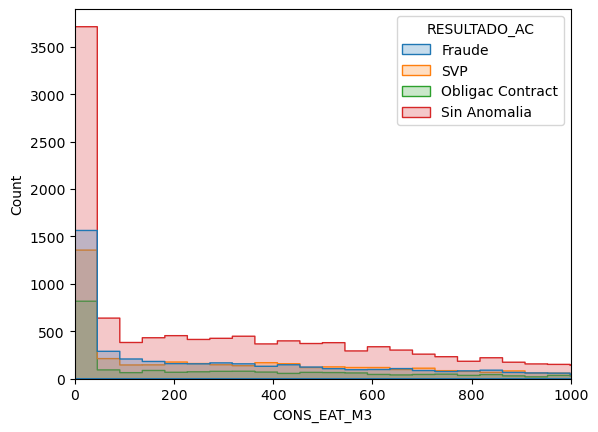

In [82]:
#Queda este
import matplotlib.pyplot as plt
import seaborn as sns
ax=sns.histplot(
    df_clean, x="CONS_EAT_M3", hue="RESULTADO_AC", element="step")
ax.set(xlim=(0, 1000))
plt.show()


In [28]:
import pandas as pd

# Asegurarte de que las columnas estén en formato datetime
df_clean['FEC_TRABAJO'] = pd.to_datetime(df_clean['FEC_TRABAJO'], errors='coerce')
df_clean['FECHA_OBSERVACION_NO_TRABAJADA'] = pd.to_datetime(df_clean['FECHA_OBSERVACION_NO_TRABAJADA'], errors='coerce')

# Calcular la diferencia en días
df_clean['diferencia_dias'] = (df_clean['FEC_TRABAJO'] - df_clean['FECHA_OBSERVACION_NO_TRABAJADA']).dt.days

# Mantener los NaN sin hacer ninguna conversión
df_clean['diferencia_dias'] = df_clean['diferencia_dias'].astype('Int64')

# Mostrar el resultado
print(df_clean[['FEC_TRABAJO', 'FECHA_OBSERVACION_NO_TRABAJADA', 'diferencia_dias']])


      FEC_TRABAJO FECHA_OBSERVACION_NO_TRABAJADA  diferencia_dias
0      2023-07-17                            NaT             <NA>
1      2023-09-05                            NaT             <NA>
2      2023-07-06                     2023-02-03              153
3      2023-09-08                     2022-10-29              314
4      2023-09-11                            NaT             <NA>
...           ...                            ...              ...
50965  2024-08-20                     2024-06-13               68
50974  2024-07-23                     2022-02-09              895
50994  2024-07-30                     2023-01-26              551
50997  2024-08-08                     2023-09-23              320
51003  2024-08-06                     2020-11-16             1359

[25031 rows x 3 columns]


In [92]:
import pandas as pd

# Supongamos que df_encoded es tu DataFrame codificado
# df_encoded = ...

# Crear la columna de categorías basada en el valor de CONS_EAT_M3
def categorize_consumption(consumption):
    if consumption < 150:
        return 'consumos R1'
    elif 150 <= consumption <= 400:
        return 'consumos R2'
    elif 400 < consumption <= 500:
        return 'consumos R3'
    elif 500 < consumption <= 600:
        return 'consumos R4'
    elif 600 < consumption <= 700:
        return 'consumos R5'
    elif 700 < consumption <= 800:
        return 'consumos R6-G1'
    elif 800 < consumption <= 2000:
        return 'consumos G2'
    elif consumption > 2000:
        return 'consumos G3'
    else:
        return 'Nohayinfo'

# Crear la columna de categorías basada en el valor de CONS_EAT_M3
def categorize_scoring(TOTAL):
    if TOTAL == 0:
        return 'SC=0'
    elif 1 <= TOTAL < 10:
        return '1<SC<10'
    elif 10 <= TOTAL <= 30:
        return '30>SC>10'
    elif  TOTAL > 30:
        return 'SC>30'
    else:
        return 'NoHayInfoSc'

def categorize_scoring_hist(SCORING_PEOR_HISTORICO_SIN_TRABAJAR):
    if SCORING_PEOR_HISTORICO_SIN_TRABAJAR == 0:
        return 'SCHist=0'
    elif 1 <= SCORING_PEOR_HISTORICO_SIN_TRABAJAR < 10:
        return 'SCHist<10'
    elif 10 <= SCORING_PEOR_HISTORICO_SIN_TRABAJAR <= 30:
        return '30>SCHist>10'
    elif SCORING_PEOR_HISTORICO_SIN_TRABAJAR > 30:
        return 'SCHist>30'
    else:
        return 'NohayInfoScHist'

def categorize_desvio_bimestral(DESVIO_BIMESTRAL):
    if 0 > DESVIO_BIMESTRAL > -30:
        return 'DesvioBajo'
    elif DESVIO_BIMESTRAL <= -30:
        return 'DesvioAlto'
    elif DESVIO_BIMESTRAL >= 0:
        return 'SinDesvio'
    else:
        return 'NoHayInformacionDesvio'

def categorize_desvio_anual(DESVIO_ANUAL):
    if 0 > DESVIO_ANUAL >= -30:
        return 'DesvioBajo'
    elif DESVIO_ANUAL < -30:
        return 'DesvioAlto'
    elif DESVIO_ANUAL >= 0:
        return 'SinDesvio'
    else:
        return 'NoHayInformacionDesvio'

def categorize_diferencia_trabajo(diferencia_dias):
    if pd.isna(diferencia_dias):
        return 'NoHayobservacion'
    elif 0 < diferencia_dias <=90:
        return 'ObsTrabajada<90dias'
    elif 180 >= diferencia_dias > 90:
        return '90<ObsTrabajada<180dias'
    elif diferencia_dias > 180:
        return 'ObsTrabajada+180dias'
    else:
        return 'NoHayobservacion'

df_clean['desvioanual'] = df_clean['DESVIO_ANUAL'].apply(categorize_desvio_anual)
df_clean['desviobimestral'] = df_clean['DESVIO_BIMESTRAL'].apply(categorize_desvio_bimestral)
df_clean['categoria_consumo'] = df_clean['CONS_EAT_M3'].apply(categorize_consumption)
df_clean['categoria_scoring'] = df_clean['TOTAL'].apply(categorize_scoring)
df_clean['categoria_scoring_hist'] = df_clean['SCORING_PEOR_HISTORICO_SIN_TRABAJAR'].apply(categorize_scoring_hist)
df_clean['ObservacionesyFecTrabajo'] = df_clean['diferencia_dias'].apply(categorize_diferencia_trabajo)

# Crear la lista con las observaciones de interés
# observaciones_interes = [
#     '31 - Consumo cero sin actividad',
#     '531 - Imp. det. con o sin actividad',
#     '32 - Consumo cero con actividad',
#     '13 - Local, casa deshabitada o baldio',
#     '09CL - Medidor suelto o caido en el habitaculo C/Lectura',
#     '16 - Posible fraude o corriente directa'
# ]

# Asegurarse de que los valores en la columna son cadenas y manejar valores nulos
# df_clean['OBSERVACIONES_NO_TRABAJADAS'] = df_clean['OBSERVACIONES_NO_TRABAJADAS'].astype(str).fillna('')

# Crear la nueva columna 'observacionesnotrabajconefectiv'
# df_clean['observacionesnotrabajconefectiv'] = df_clean['OBSERVACIONES_NO_TRABAJADAS'].apply(lambda x: any(obs in x for obs in observaciones_interes))

# Mostrar las primeras filas del DataFrame para verificar
print(df_clean.head())
print(df_clean['categoria_consumo'].value_counts())
print(df_clean['desviobimestral'].value_counts())
print(df_clean['desvioanual'].value_counts())
print(df_clean['ObservacionesyFecTrabajo'].value_counts())

              Zona   Localidad FECHA_OBSERVACION_NO_TRABAJADA  \
0  Zona San Miguel  Jose C Paz                            NaT   
1  Zona San Miguel  Jose C Paz                            NaT   
2  Zona San Miguel  Jose C Paz                     2023-02-03   
3  Zona San Miguel  Jose C Paz                     2022-10-29   
4  Zona San Miguel  Jose C Paz                            NaT   

                         OBSERVACIONES_NO_TRABAJADAS  CONS_EAT_M3  TOTAL  \
0                                                nan        69.97   26.0   
1                                                nan       901.79    0.0   
2              13 - Local, casa deshabitada o baldio        34.57   34.0   
3  09CL - Medidor suelto o caido en el habitaculo...       405.34    1.0   
4                                                nan       477.59    0.0   

   Q_PESO_OBSERVACIONES  Q_BIMESTRAL_PESO  Q_BAJO_PESO  Q_PROMEDIO_1_PESO  \
0                   0.0               0.0          4.0                5.0  

In [37]:
# Asegúrate de que la columna de fechas esté en formato datetime
#df_clean['FECHA_OBSERVACION_NO_TRABAJADA'] = pd.to_datetime(df_clean['FECHA_OBSERVACION_NO_TRABAJADA'], errors='coerce')

# Crear columnas dummy para los años 2020, 2021, 2022, 2023 y 2024
#for year in range(2020, 2025):
#    df_clean[f'OBS_{year}'] = df_clean['FECHA_OBSERVACION_NO_TRABAJADA'].dt.year == year

# Crear una columna dummy para los registros sin fecha
#df_clean['SinObservacionNoTrabajada'] = df_clean['FECHA_OBSERVACION_NO_TRABAJADA'].isna()

# Verificar el resultado
#print(df_clean[['FECHA_OBSERVACION_NO_TRABAJADA'] + [f'OBS_{year}' for year in range(2020, 2025)] + ['SinObservacionNoTrabajada']].head())

In [94]:
df_2024 = df_clean[df_clean['FEC_TRABAJO'].dt.year == 2024]


In [95]:
df_clean2=df_2024.drop(columns= ['CONS_EAT_M3','TOTAL','SCORING_PEOR_HISTORICO_SIN_TRABAJAR','OBSERVACIONES_NO_TRABAJADAS','Espontanea'])

# Seleccionar las columnas relevantes
columns_of_interest = [
    'categoria_consumo', 'RESULTADO_AC (ANTERIOR)', 
    'categoria_scoring_hist', 
    'categoria_scoring',  'SEGMENTACION','Color','desviobimestral','desvioanual','ObservacionesyFecTrabajo'
]

# Convertir las columnas especificadas en variables dummy si son categóricas
df_encoded = pd.get_dummies(df_clean2, columns=[col for col in columns_of_interest if df_clean[col].dtype == 'object'], dummy_na=True)
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
Index: 17680 entries, 5194 to 51003
Data columns (total 81 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   Zona                                              17680 non-null  object        
 1   Localidad                                         17680 non-null  object        
 2   FECHA_OBSERVACION_NO_TRABAJADA                    12775 non-null  datetime64[ns]
 3   Q_PESO_OBSERVACIONES                              13094 non-null  float64       
 4   Q_BIMESTRAL_PESO                                  13094 non-null  float64       
 5   Q_BAJO_PESO                                       13094 non-null  float64       
 6   Q_PROMEDIO_1_PESO                                 13094 non-null  float64       
 7   Q_PROMEDIO_2_PESO                                 13094 non-null  float64       
 8   Q_ANUAL_PESO                

In [98]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17680 entries, 5194 to 51003
Data columns (total 81 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   Zona                                              17680 non-null  object        
 1   Localidad                                         17680 non-null  object        
 2   FECHA_OBSERVACION_NO_TRABAJADA                    12775 non-null  datetime64[ns]
 3   Q_PESO_OBSERVACIONES                              13094 non-null  float64       
 4   Q_BIMESTRAL_PESO                                  13094 non-null  float64       
 5   Q_BAJO_PESO                                       13094 non-null  float64       
 6   Q_PROMEDIO_1_PESO                                 13094 non-null  float64       
 7   Q_PROMEDIO_2_PESO                                 13094 non-null  float64       
 8   Q_ANUAL_PESO                

VERSION 2 calculo MATRICIAL

In [100]:
import pandas as pd
import itertools

# Supongamos que df_clean es tu DataFrame limpio
# df_clean = ...

# Seleccionar las columnas relevantes para las combinaciones
columns_of_interest2 = [
    'SinTarifa','TarifaT1R','TarifaT1G',
    'categoria_consumo_consumos R1','categoria_consumo_consumos R2','categoria_consumo_consumos R3','categoria_consumo_consumos R4',
    'categoria_consumo_consumos R5','categoria_consumo_consumos R6-G1','categoria_consumo_consumos G2','categoria_consumo_consumos G3',
    'categoria_scoring_SC=0','categoria_scoring_1<SC<10','categoria_scoring_SC>30','categoria_scoring_30>SC>10',
    'categoria_scoring_hist_30>SCHist>10','categoria_scoring_hist_SCHist<10','categoria_scoring_hist_SCHist>30','categoria_scoring_hist_NohayInfoScHist',
    'RESULTADO_AC (ANTERIOR)_no tuvo ac anterior', 
    'SEGMENTACION_A - Altos Ingresos', 'SEGMENTACION_B - Bajos Ingresos', 
    'SEGMENTACION_M - Ingresos Medios', 'SEGMENTACION_Sin Segmentación',
    'observacion_32','observacion_09','observacion_16','observaciones_descarte','observacion531','observacion_54',
    'desvioanual_DesvioAlto','desvioanual_DesvioBajo','desvioanual_SinDesvio','desvioanual_NoHayInformacionDesvio',
    'ObservacionesyFecTrabajo_90<ObsTrabajada<180dias','ObservacionesyFecTrabajo_NoHayobservacion','ObservacionesyFecTrabajo_ObsTrabajada+180dias','ObservacionesyFecTrabajo_ObsTrabajada<90dias'
]

# Rellenar cualquier NA restante con 016
df_encoded = df_encoded.fillna(0)

# Agregar una columna binaria para identificar fraudes
df_encoded['Fraude'] = df_clean2['RESULTADO_AC'] == 'Fraude'

# Definir grupos mutuamente excluyentes
mutually_exclusive_groups = [
    ['SinTarifa','TarifaT1R','TarifaT1G'],
    ['desvioanual_DesvioAlto','desvioanual_DesvioBajo','desvioanual_SinDesvio','desvioanual_NoHayInformacionDesvio'],
    ['observacion_32','observacion_09','observacion_16','observaciones_descarte','observacion531','observacion_54'],
    ['categoria_consumo_consumos R1','categoria_consumo_consumos R2','categoria_consumo_consumos R3','categoria_consumo_consumos R4',
    'categoria_consumo_consumos R5','categoria_consumo_consumos R6-G1''categoria_consumo_consumos G2','categoria_consumo_consumos G3'],
    ['categoria_scoring_SC=0','categoria_scoring_1<SC<10','categoria_scoring_SC>30','categoria_scoring_30>SC>10'],
    ['categoria_scoring_hist_30>SCHist>10','categoria_scoring_hist_SCHist<10','categoria_scoring_hist_SCHist>30','categoria_scoring_hist_NohayInfoScHist'],
    ['SEGMENTACION_A - Altos Ingresos', 'SEGMENTACION_B - Bajos Ingresos', 'SEGMENTACION_M - Ingresos Medios', 'SEGMENTACION_Sin Segmentación'],
    ['RESULTADO_AC (ANTERIOR)_Fraude', 'RESULTADO_AC (ANTERIOR)_Obligac Contract', 'RESULTADO_AC (ANTERIOR)_Sin Anomalia','RESULTADO_AC (ANTERIOR)_no tuvo ac anterior'],
    ['ObservacionesyFecTrabajo_90<ObsTrabajada<180dias','ObservacionesyFecTrabajo_NoHayobservacion','ObservacionesyFecTrabajo_ObsTrabajada+180dias','ObservacionesyFecTrabajo_ObsTrabajada<90dias']
]

# Verificar si una combinación es válida (no contiene elementos mutuamente excluyentes)
def is_valid_combination(combo, exclusive_groups):
    for group in exclusive_groups:
        count = sum(1 for item in combo if item in group)
        if count > 1:
            return False
    return True

# Generar todas las combinaciones posibles de las variables de interés
combinations = []
for r in range(2, 7):  # Aquí se limita a combinaciones de 2 a 5 elementos:
    for combo in itertools.combinations(columns_of_interest2, r):
        if is_valid_combination(combo, mutually_exclusive_groups):
            combinations.append(combo)

# Calcular la proporción de fraudes para cada combinación
fraud_proportions = []
for combo in combinations:
    subset = df_encoded[list(combo) + ['Fraude']]
    subset = subset[subset[list(combo)].all(axis=1)]  # Filtrar filas donde todas las columnas de la combinación son True
    total_count = subset.shape[0]
    fraud_count = subset[subset['Fraude'] == True].shape[0]
    fraud_ratio = fraud_count / total_count if total_count > 0 else 0
    fraud_proportions.append((combo, fraud_ratio, total_count))

In [103]:
# Definir umbrales para considerar una combinación interesante
min_cases_threshold = 50  # Umbral mínimo de casos
min_fraud_ratio_threshold = 0.2  # Umbral mínimo de proporción de fraudes

# Filtrar las combinaciones que cumplan con los umbrales
interesting_combinations = [item for item in fraud_proportions if item[2] >= min_cases_threshold and item[1] >= min_fraud_ratio_threshold]

# Ordenar las combinaciones interesantes primero por el total de casos y luego por la proporción de fraudes, ambos en orden descendente
interesting_combinations = sorted(interesting_combinations, key=lambda x: (x[1], x[2]), reverse=True)

# Mostrar las combinaciones interesantes
for combo, ratio, count in interesting_combinations[:10]:  # Mostrar las 10 mejores combinaciones
    print(f"Combinación: {combo}, Proporción de Fraudes: {ratio:.4f}, Total Casos: {count}")


Combinación: ('categoria_consumo_consumos R2', 'categoria_scoring_SC>30', 'categoria_scoring_hist_SCHist>30', 'RESULTADO_AC (ANTERIOR)_no tuvo ac anterior', 'ObservacionesyFecTrabajo_90<ObsTrabajada<180dias'), Proporción de Fraudes: 0.4746, Total Casos: 59
Combinación: ('categoria_consumo_consumos R2', 'categoria_scoring_SC>30', 'RESULTADO_AC (ANTERIOR)_no tuvo ac anterior', 'ObservacionesyFecTrabajo_90<ObsTrabajada<180dias'), Proporción de Fraudes: 0.4638, Total Casos: 69
Combinación: ('categoria_consumo_consumos R2', 'categoria_scoring_SC>30', 'categoria_scoring_hist_SCHist>30', 'ObservacionesyFecTrabajo_90<ObsTrabajada<180dias'), Proporción de Fraudes: 0.4590, Total Casos: 61
Combinación: ('categoria_consumo_consumos R2', 'categoria_scoring_hist_SCHist>30', 'RESULTADO_AC (ANTERIOR)_no tuvo ac anterior', 'SEGMENTACION_B - Bajos Ingresos', 'ObservacionesyFecTrabajo_90<ObsTrabajada<180dias'), Proporción de Fraudes: 0.4483, Total Casos: 58
Combinación: ('categoria_consumo_consumos R2', 

In [109]:
### import pandas as pd
import itertools

# Filtrar el DataFrame para la zona "La Matanza"
df_matanza = df_encoded[df_2024['Zona'] == 'Zona Merlo']

# Asegúrate de que las columnas relevantes estén presentes en df_matanza
df_matanza_encoded = df_matanza[columns_of_interest2].fillna(0)

# Agregar una columna binaria para identificar fraudes en "La Matanza"
df_matanza_encoded['Fraude'] = df_matanza['RESULTADO_AC'] == 'Fraude'

# Definir umbrales para considerar una combinación interesante
min_cases_threshold = 40  # Umbral mínimo de casos
min_fraud_ratio_threshold = 0.2  # Umbral mínimo de proporción de fraudes

# Evaluar las combinaciones generales en "La Matanza"
matanza_combinations = []
for combo, _, _ in interesting_combinations:
    subset = df_matanza_encoded[list(combo) + ['Fraude']]
    subset = subset[subset[list(combo)].all(axis=1)]  # Filtrar filas donde todas las columnas de la combinación son True
    total_count = subset.shape[0]
    fraud_count = subset[subset['Fraude'] == True].shape[0]
    fraud_ratio = fraud_count / total_count if total_count > 0 else 0
    
    # Aplicar los umbrales
    if total_count >= min_cases_threshold and fraud_ratio >= min_fraud_ratio_threshold:
        matanza_combinations.append((combo, fraud_ratio, total_count))

# Ordenar las combinaciones generales según su efectividad en "La Matanza"
matanza_combinations = sorted(matanza_combinations, key=lambda x: (x[1], x[2]), reverse=True)

# Mostrar las combinaciones interesantes en "La Matanza"
print("Combinaciones en San Martin:")
for combo, ratio, count in matanza_combinations[:10]:  # Mostrar las 10 mejores combinaciones
    print(f"Combinación: {combo}, Proporción de Fraudes: {ratio:.4f}, Total Casos: {count}")

Combinaciones en San Martin:
Combinación: ('categoria_consumo_consumos R2', 'categoria_scoring_SC>30', 'categoria_scoring_hist_SCHist>30'), Proporción de Fraudes: 0.4000, Total Casos: 40
Combinación: ('categoria_consumo_consumos R2', 'observacion_16'), Proporción de Fraudes: 0.3864, Total Casos: 44
Combinación: ('categoria_consumo_consumos R1', 'categoria_scoring_hist_SCHist>30', 'RESULTADO_AC (ANTERIOR)_no tuvo ac anterior', 'SEGMENTACION_B - Bajos Ingresos', 'observacion531', 'desvioanual_DesvioAlto'), Proporción de Fraudes: 0.3778, Total Casos: 45
Combinación: ('categoria_consumo_consumos R2', 'categoria_scoring_SC>30'), Proporción de Fraudes: 0.3774, Total Casos: 53
Combinación: ('categoria_consumo_consumos R1', 'RESULTADO_AC (ANTERIOR)_no tuvo ac anterior', 'SEGMENTACION_B - Bajos Ingresos', 'observacion531', 'desvioanual_DesvioAlto'), Proporción de Fraudes: 0.3750, Total Casos: 48
Combinación: ('categoria_consumo_consumos R1', 'categoria_scoring_SC>30', 'SEGMENTACION_B - Bajos In

In [110]:
import pandas as pd

# Función para calcular la efectividad de una variable específica
def calcular_efectividad_variable(df, variable, target='Fraude'):
    valores = df[variable].unique()
    efectividad = []

    for valor in valores:
        subset = df[df[variable] == valor]
        total_count = subset.shape[0]
        fraud_count = subset[subset[target] == True].shape[0]
        fraud_ratio = fraud_count / total_count if total_count > 0 else 0
        efectividad.append((valor, fraud_ratio, total_count))

    # Ordenar por efectividad
    efectividad = sorted(efectividad, key=lambda x: (x[1], x[2]), reverse=True)
    return efectividad

# Filtrar el DataFrame para la zona "La Matanza"
df_matanza = df_encoded[df_clean['Zona'] == 'Zona San Martin']

# Asegúrate de que las columnas relevantes estén presentes en df_matanza
df_matanza_encoded = df_matanza[columns_of_interest2].fillna(0)

# Agregar una columna binaria para identificar fraudes en "La Matanza"
df_matanza_encoded['Fraude'] = df_matanza['RESULTADO_AC'] == 'Fraude'

# Variable a evaluar
variable_a_evaluar = 'observacion_16'  # Cambia esto a la variable que quieras evaluar

# Calcular la efectividad de la variable
efectividad_variable = calcular_efectividad_variable(df_matanza_encoded, variable_a_evaluar)

# Mostrar los resultados
print(f"Efectividad de la variable '{variable_a_evaluar}' en La San martin:")
for valor, ratio, count in efectividad_variable:
    print(f"Valor: {valor}, Proporción de Fraudes: {ratio:.4f}, Total Casos: {count}")


Efectividad de la variable 'observacion_16' en La San martin:
Valor: True, Proporción de Fraudes: 0.1774, Total Casos: 248
Valor: False, Proporción de Fraudes: 0.1620, Total Casos: 1765


C:\Users\mffigarola\AppData\Local\Temp\ipykernel_19140\3109835970.py:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


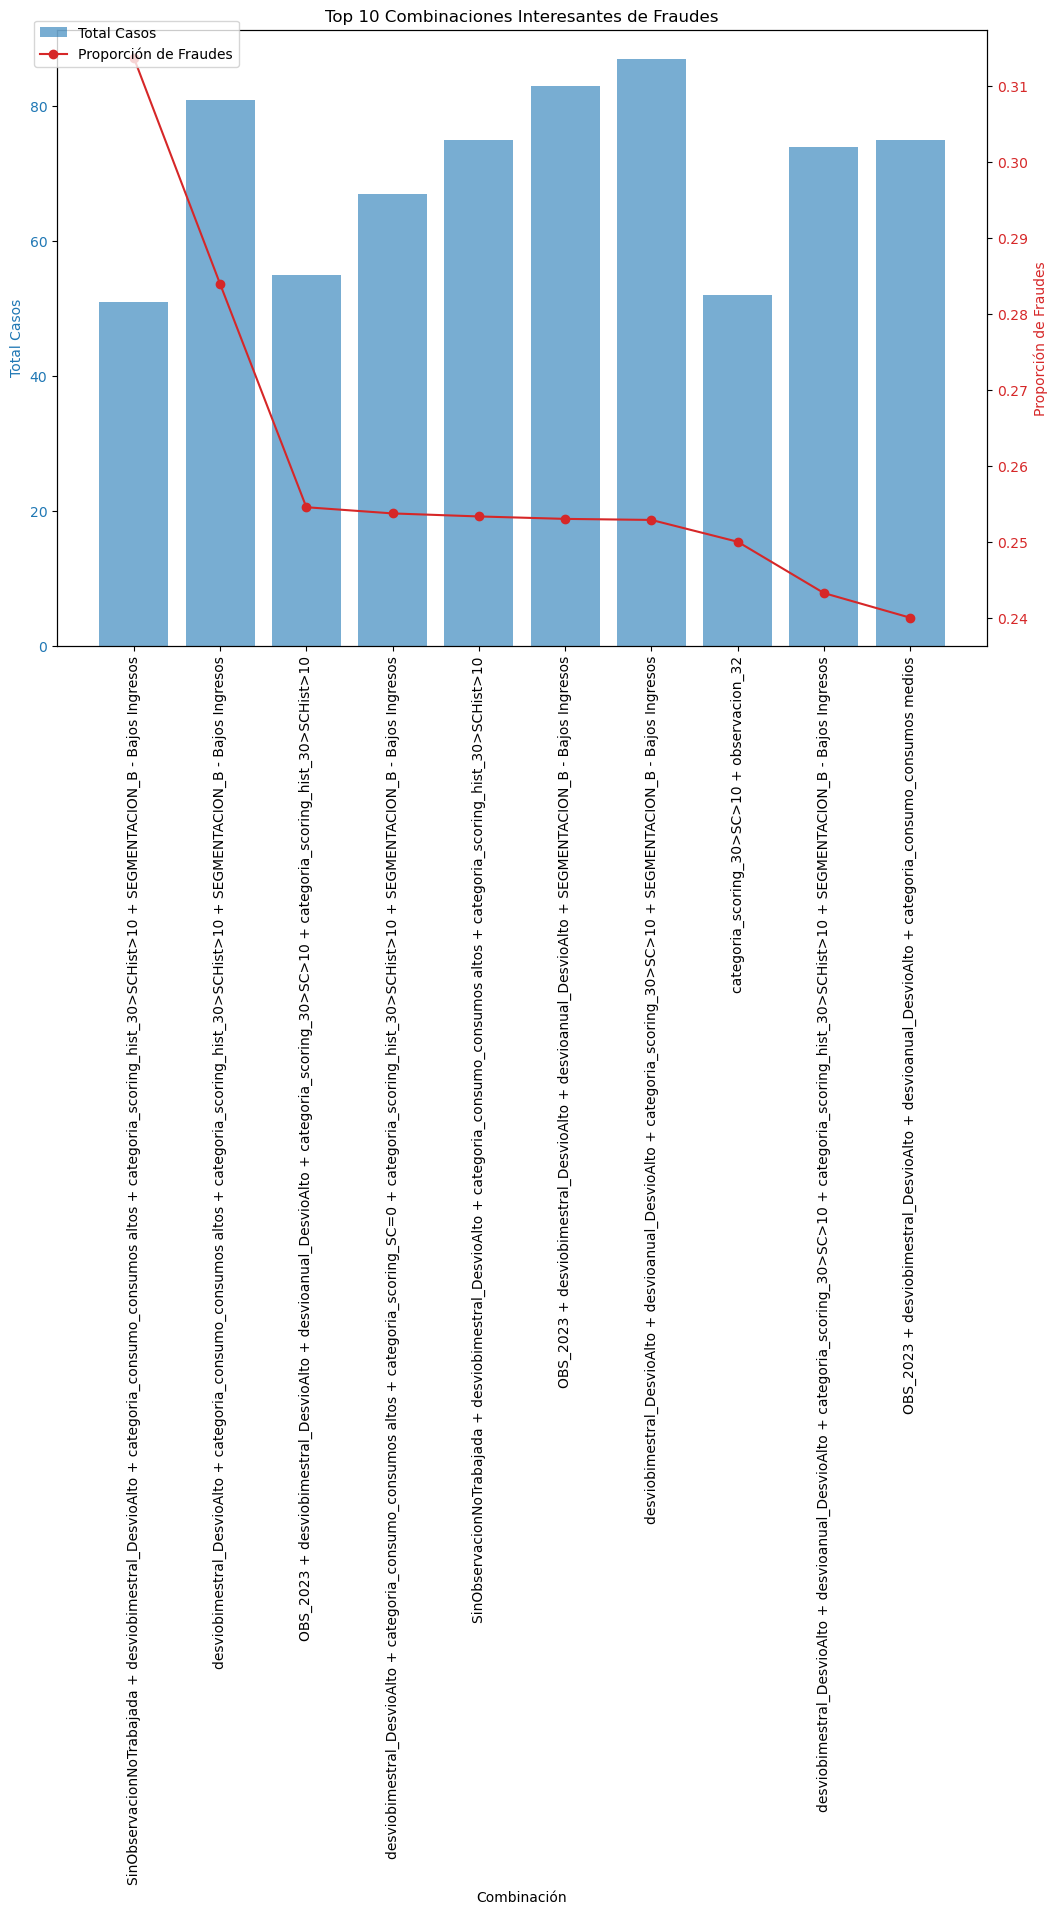

In [76]:
# Crear un DataFrame para facilitar la visualización
df_results = pd.DataFrame(interesting_combinations, columns=['Combinación', 'Proporción de Fraudes', 'Total Casos'])
df_results.to_csv('combinacionesmerlo.csv', index=False)
# Tomar las 10 mejores combinaciones para graficar
df_top10 = df_results.head(10)

# Graficar las combinaciones
fig, ax1 = plt.subplots(figsize=(12, 8))

# Graficar el número total de casos
color = 'tab:blue'
ax1.set_xlabel('Combinación')
ax1.set_ylabel('Total Casos', color=color)
ax1.bar(df_top10['Combinación'].apply(lambda x: ' + '.join(x)), df_top10['Total Casos'], color=color, alpha=0.6, label='Total Casos')
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=90)

# Crear un segundo eje y para la proporción de fraudes
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Proporción de Fraudes', color=color)
ax2.plot(df_top10['Combinación'].apply(lambda x: ' + '.join(x)), df_top10['Proporción de Fraudes'], color=color, marker='o', label='Proporción de Fraudes')
ax2.tick_params(axis='y', labelcolor=color)

# Añadir leyendas
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.title('Top 10 Combinaciones Interesantes de Fraudes')
plt.show()

In [160]:
# Ejemplo de verificación manual para una combinación específica
combo = ['categoria_scoring_20>SC>10']
subset = df_encoded[df_encoded[combo].sum(axis=1) > 0]
total_count = subset.shape[0]
fraud_count = subset[subset['Fraude'] == True].shape[0]
fraud_ratio = fraud_count / total_count if total_count > 0 else 0
print(f"Manual check for {combo}: Proporción de Fraudes: {fraud_ratio:.4f}")

Manual check for ['categoria_scoring_20>SC>10']: Proporción de Fraudes: 0.0585


In [161]:
global_fraud_ratio = df_encoded['Fraude'].mean()
print(f"Global Proporción de Fraudes: {global_fraud_ratio:.4f}")

Global Proporción de Fraudes: 0.0423


In [35]:
pip install pygwalker -q --trusted-host pypi.org --trusted-host files.pythonhosted.org --trusted-host pypi.python.org --no-cache-dir

Note: you may need to restart the kernel to use updated packages.
